## Problem Statement

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car How well those variables describe the price of a car Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market.

## Step 1: Reading and Understanding the Data

In [1]:
# Suppress Warnings,memory settings

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

df = pd.read_csv("CarPrice_Assignment.csv",encoding = "ISO-8859-1", low_memory=False)
df.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0

In [2]:
#Check the size of the data set 

df.shape

(205, 26)

In [3]:
df.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

In [4]:
# Check if data set contains any nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [5]:
# Check the DataFrame for null / empty
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
#Above numbers are not giving clear picture. So, converting in percentage of missing value in each column
round((df.isnull().sum()/len(df.index))*100, 2)

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

In [7]:
#Identify the columns which have 100% missing values
columns_for_missing_100_pc_values = df.columns[(df.isnull().sum()/len(df.index))*100 == 100]
print(len(columns_for_missing_100_pc_values))

0


In [8]:
# Check missing values in row
df.isnull().sum(axis=1)
len(df[df.isnull().sum(axis=1) > 5].index)

0

## Data Cleanup has been done because data looks clean by and large. 
Let'scheck whether all columns are in the correct format

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [10]:
#split carname column
df['CarName'] = df['CarName'].astype(str)
df['CarName'] = df['CarName'].str.split(" ")
df['CarName'] = df['CarName'].map(lambda x: x[0])
#print(df['CarName'])
print(df['CarName'].unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


In [11]:
# convert multiple car name values into single value
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']

['alfa-romeroaudibmwchevroletdodgehondaisuzujaguarmaxdamazdabuickmercurymitsubishiNissannissanpeugeotplymouthporscheporcshcerenaultsaabsubarutoyotatoyoutavokswagenvolkswagenvwvolvo']

In [12]:
# convert multiple car name values into single value
def convert(n):
    if n == 'nissan':
        return 'Nissan'
    elif n == 'saab':
        return 'subaru'
    elif n == 'toyouta':
        return 'toyota'
    elif n == 'vokswagen':
        return 'volkswagen'
    elif n == 'porsche':
        return 'porcshce'
    elif n == 'vw':
        return 'volkswagen'
    else:
        return n
        
df['CarName'] = df['CarName'].apply(lambda x: convert(x))

In [13]:
# Now we have unique car values
print(df['CarName'].unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'peugeot'
 'plymouth' 'porcshce' 'renault' 'subaru' 'toyota' 'volkswagen' 'volvo']


## Visualising the Data

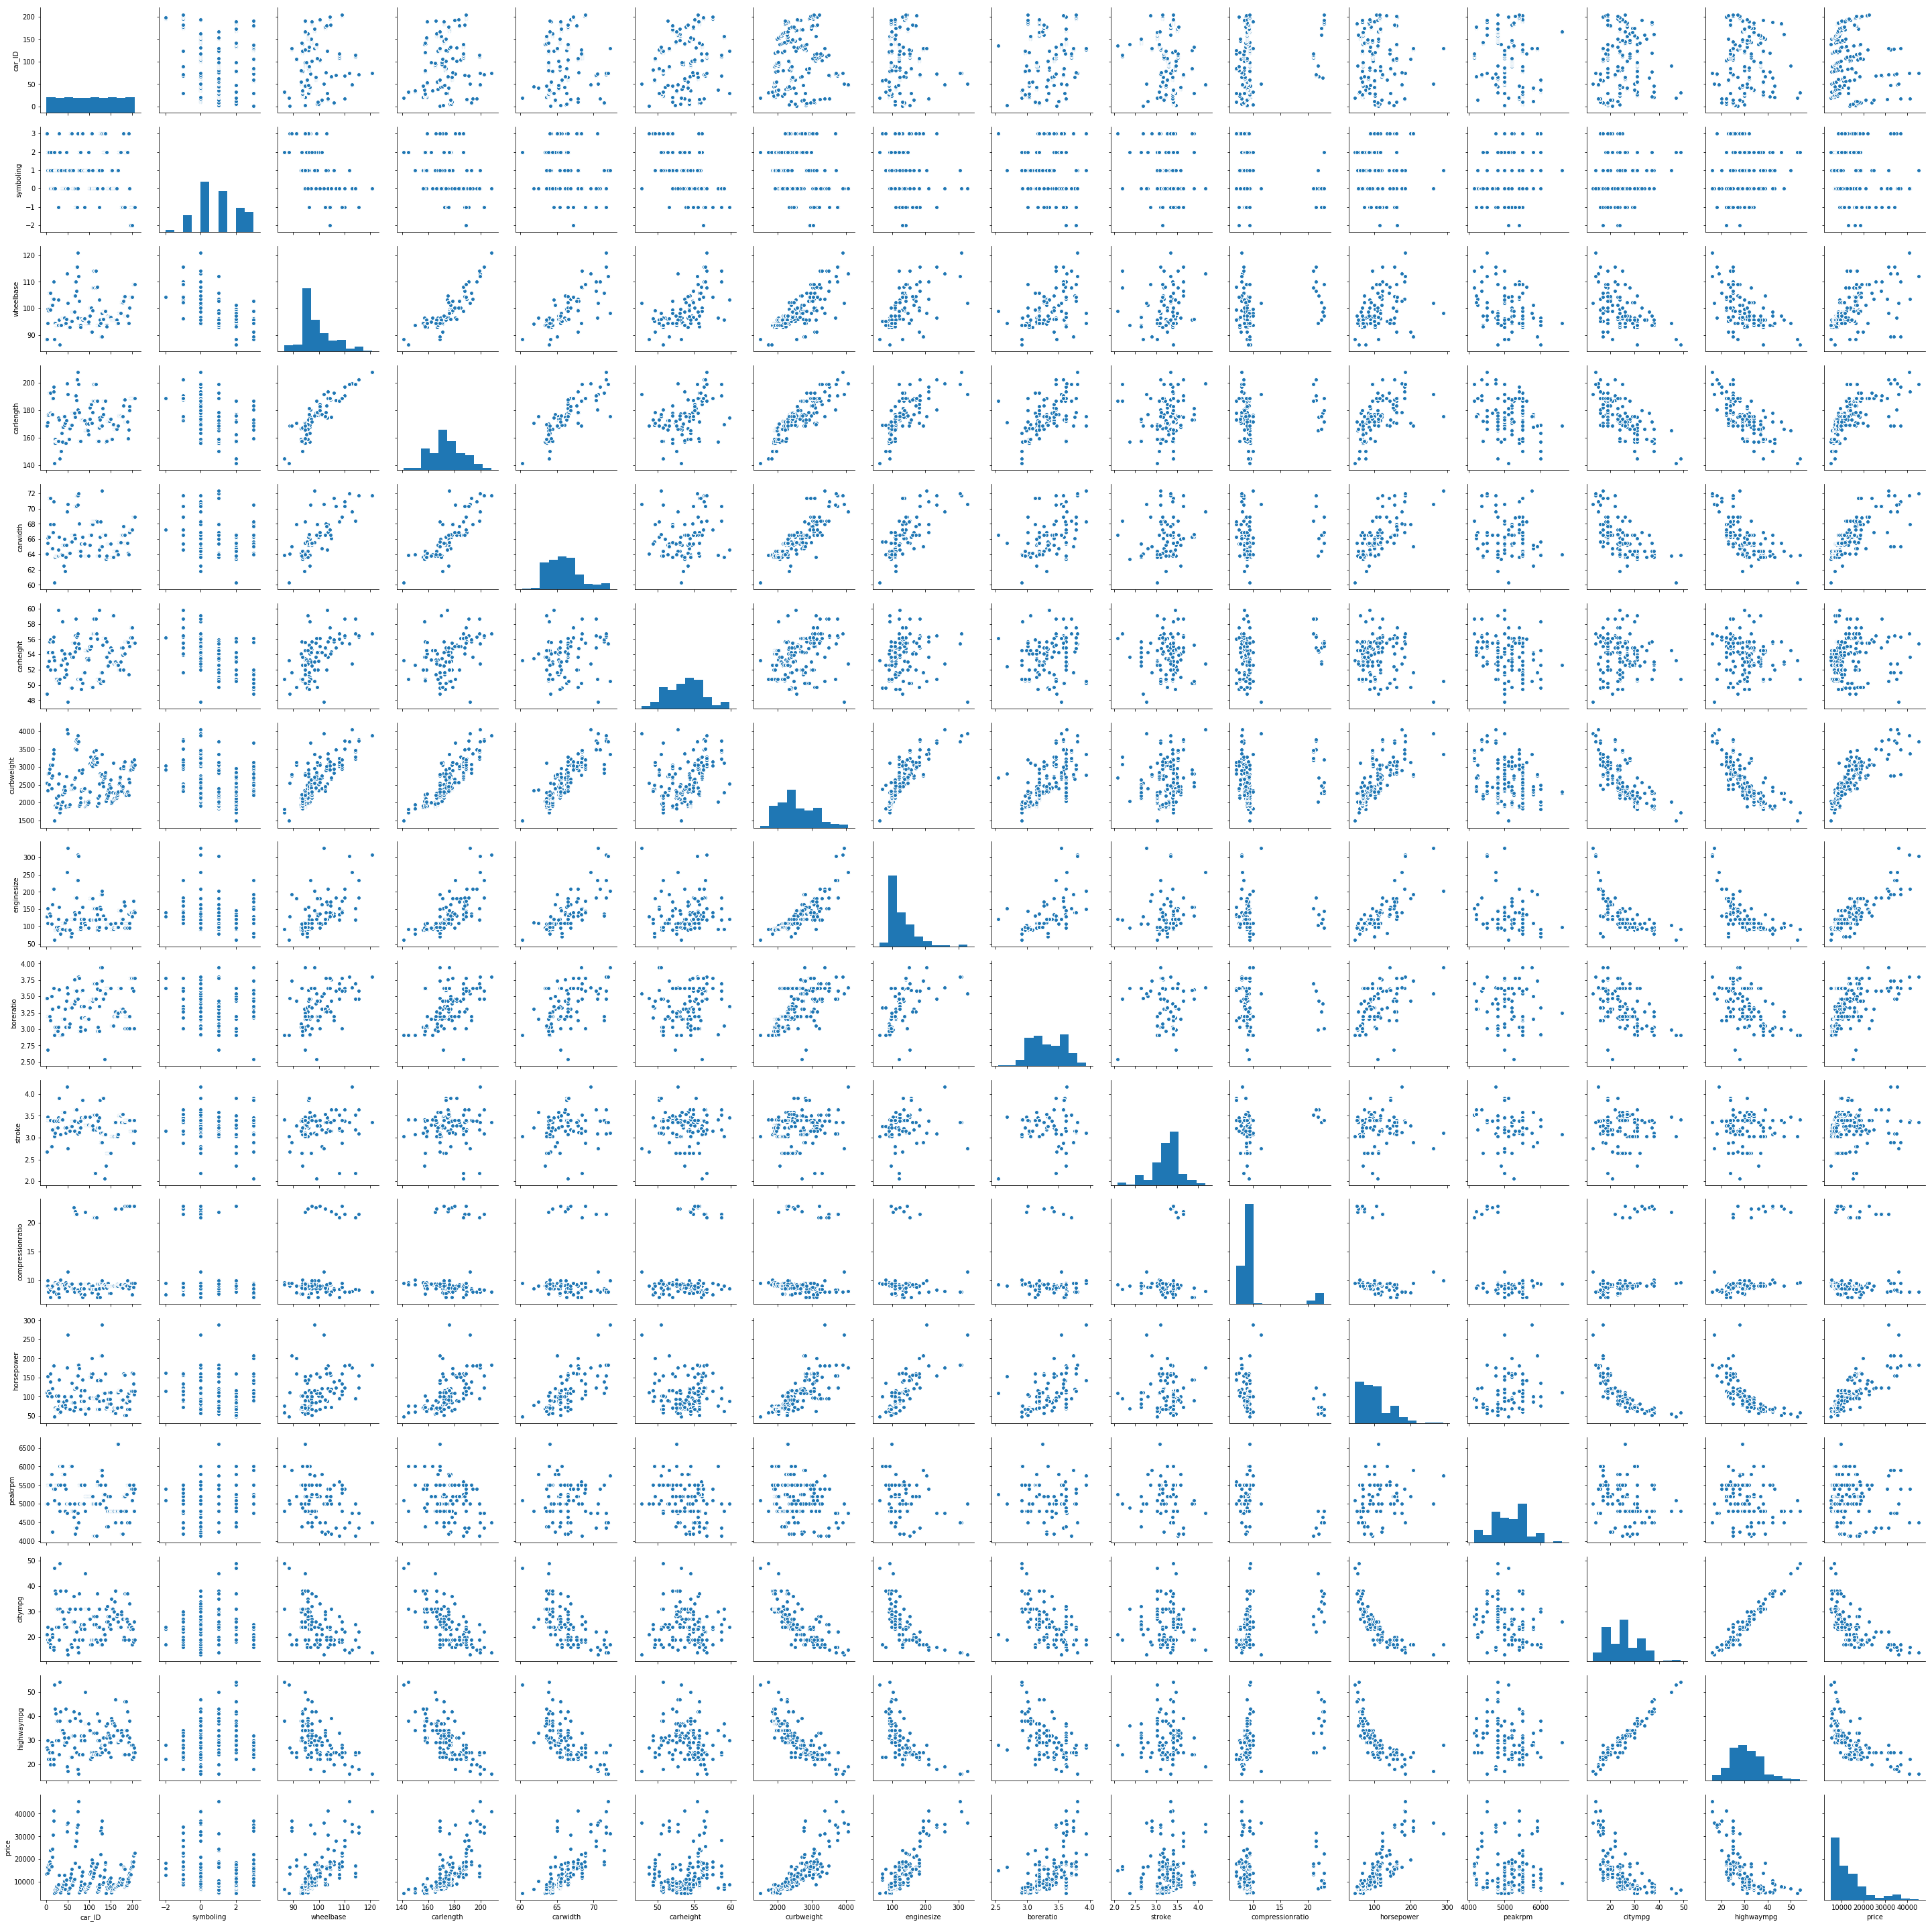

In [14]:
#Make a pair plot of all numerical variables
sns.pairplot(df)
plt.show()

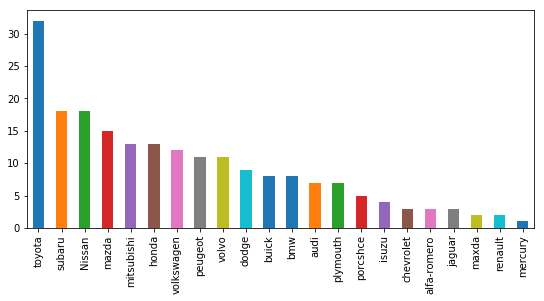

In [15]:
# check car brands
plt.figure(figsize=(20, 4))
plt.subplot(1, 2, 1)
df["CarName"].value_counts().plot(kind="bar")
plt.show()

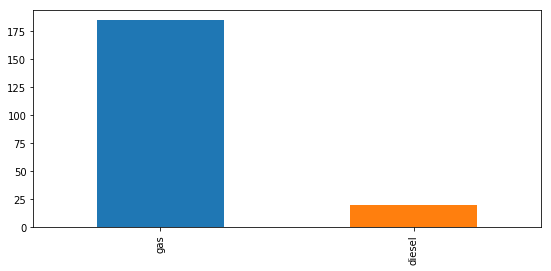

In [16]:
plt.figure(figsize=(20, 4))
plt.subplot(1, 2, 1)
df["fueltype"].value_counts().plot(kind="bar")
plt.show()

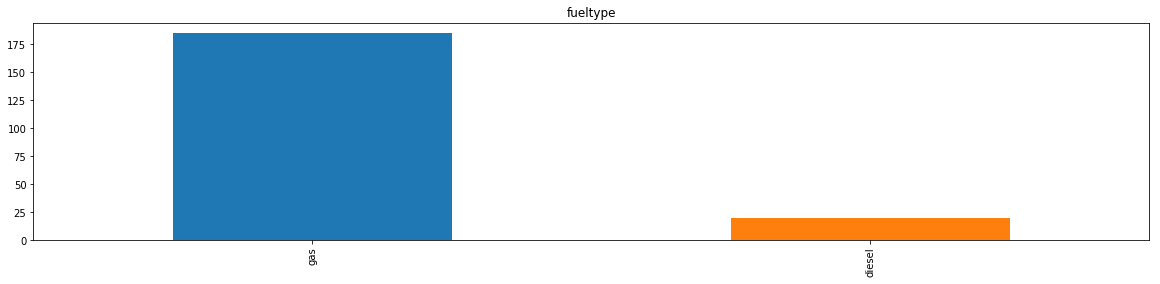

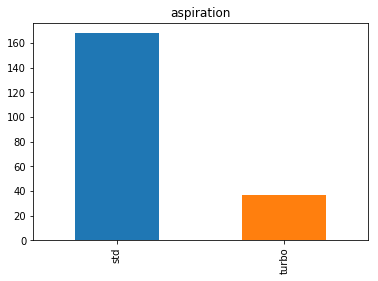

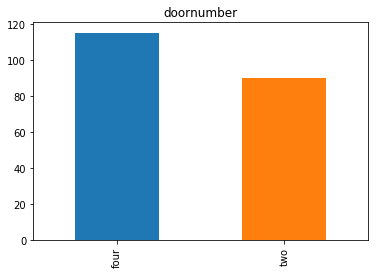

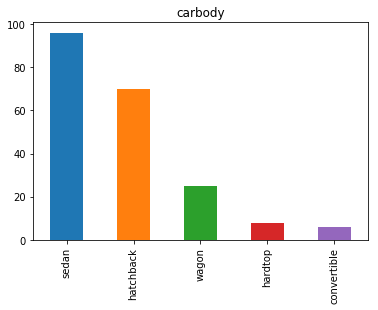

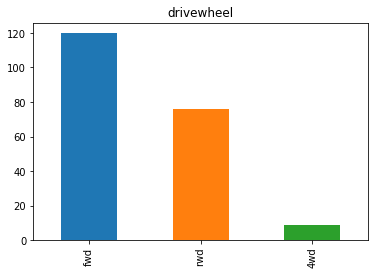

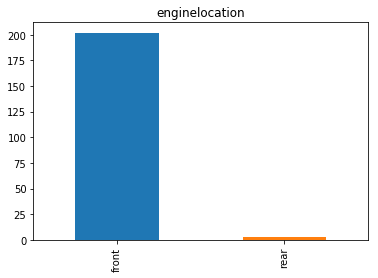

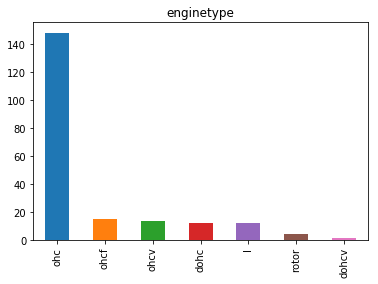

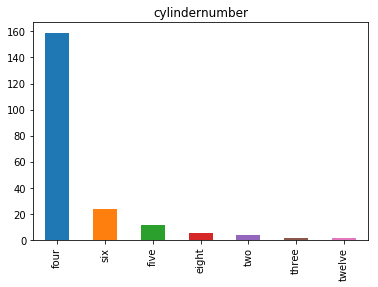

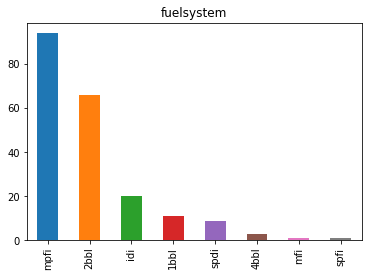

In [17]:
# univariate analysis

plt.figure(figsize=(20, 4))

df["fueltype"].value_counts(sort=True).plot(kind="bar")
plt.title('fueltype')
plt.show()

df["aspiration"].value_counts(sort=True).plot(kind="bar")
plt.title('aspiration')
plt.show()

df["doornumber"].value_counts(sort=True).plot(kind="bar")
plt.title('doornumber')
plt.show()

df["carbody"].value_counts(sort=True).plot(kind="bar")
plt.title('carbody')
plt.show()

df["drivewheel"].value_counts(sort=True).plot(kind="bar")
plt.title('drivewheel')
plt.show()

df["enginelocation"].value_counts(sort=True).plot(kind="bar")
plt.title('enginelocation')
plt.show()

df["enginetype"].value_counts(sort=True).plot(kind="bar")
plt.title('enginetype')
plt.show()

df["cylindernumber"].value_counts(sort=True).plot(kind="bar")
plt.title('cylindernumber')
plt.show()

df["fuelsystem"].value_counts(sort=True).plot(kind="bar")
plt.title('fuelsystem')
plt.show()

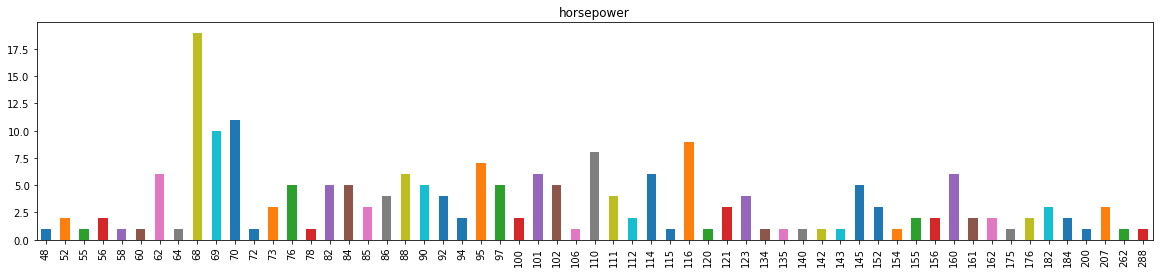

In [18]:
# horse power
plt.figure(figsize=(20, 4))
df["horsepower"].value_counts().sort_index().plot(kind="bar")
plt.title('horsepower')
plt.show()

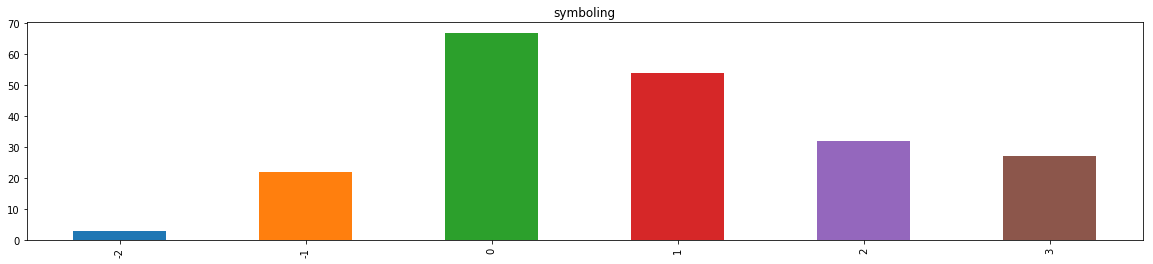

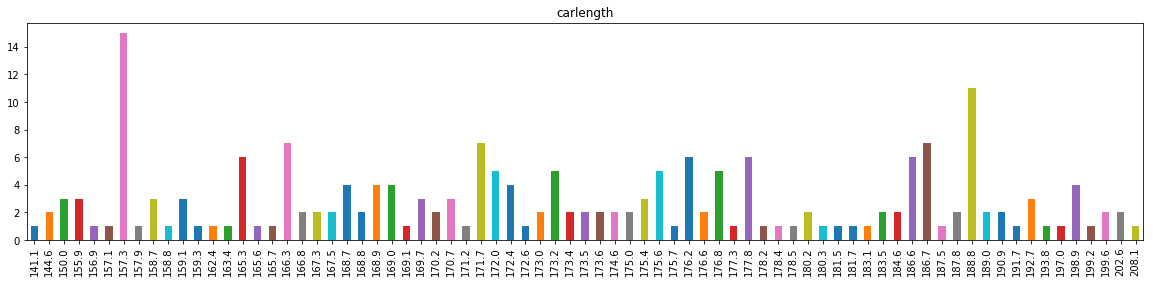

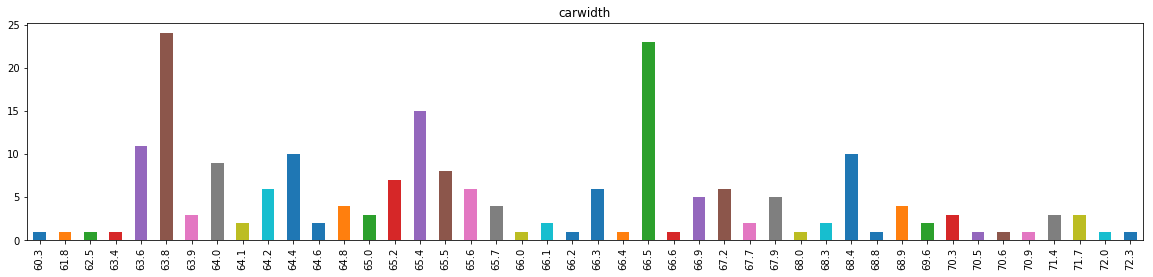

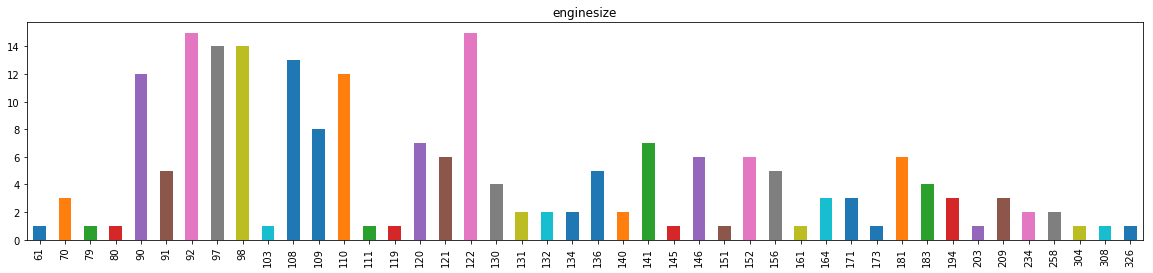

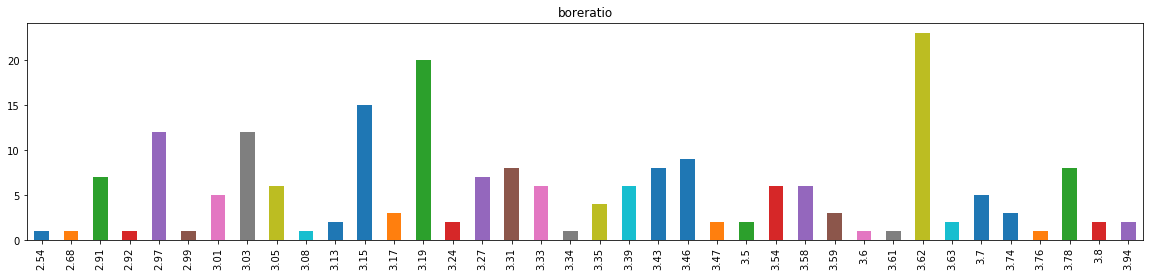

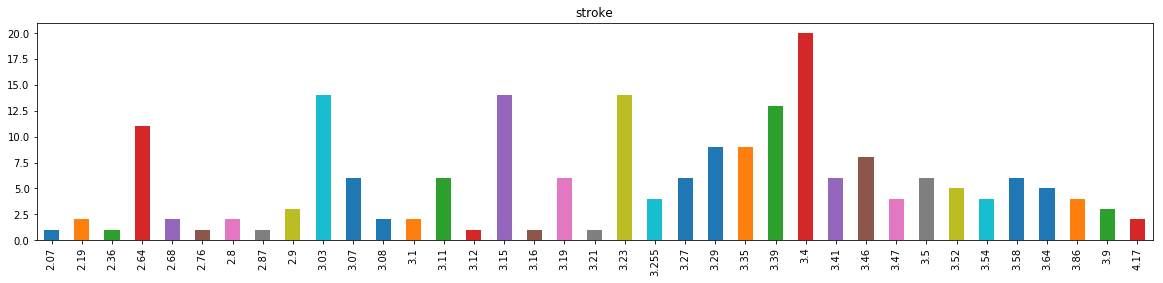

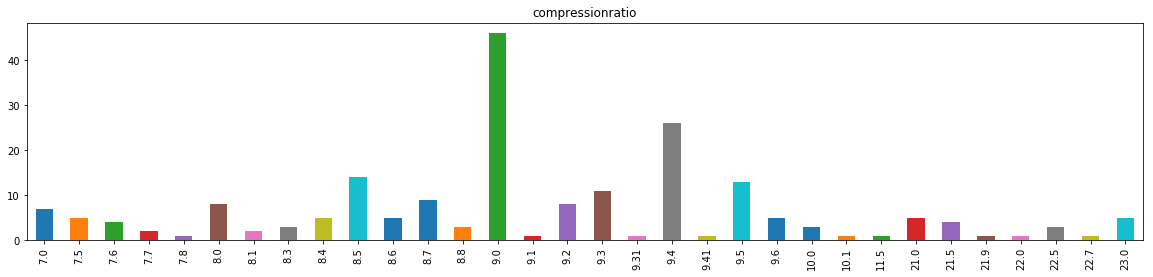

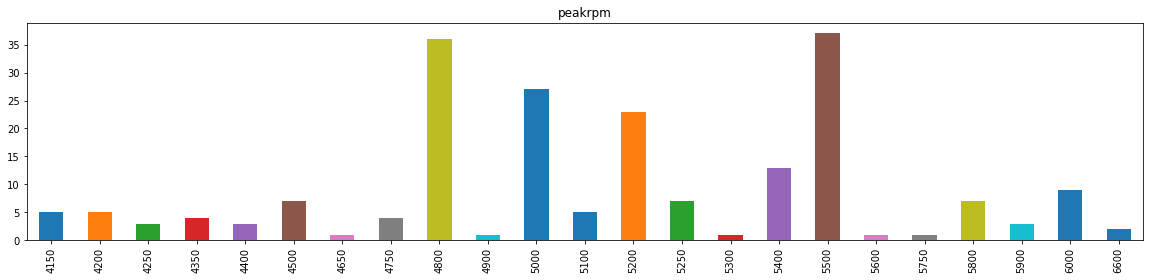

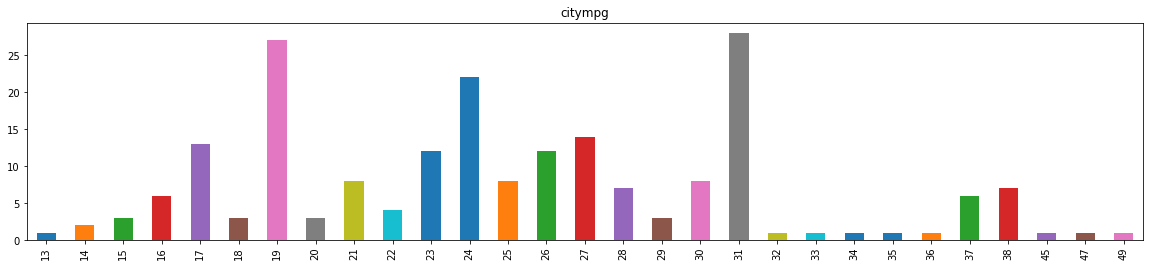

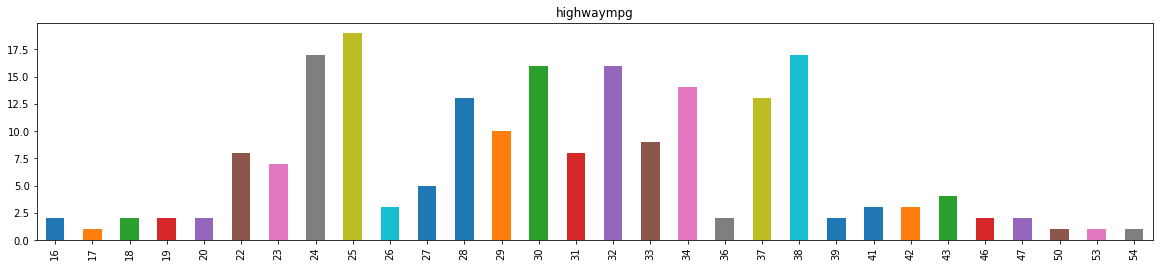

In [19]:
# univariate analysis on int and float columns 

plt.figure(figsize=(20, 4))
df["symboling"].value_counts().sort_index().plot(kind="bar")
plt.title('symboling')
plt.show()  

plt.figure(figsize=(20, 4))
df["carlength"].value_counts().sort_index().plot(kind="bar")
plt.title('carlength')
plt.show()  

plt.figure(figsize=(20, 4))
df["carwidth"].value_counts().sort_index().plot(kind="bar")
plt.title('carwidth')
plt.show()  

plt.figure(figsize=(20, 4))
df["enginesize"].value_counts().sort_index().plot(kind="bar")
plt.title('enginesize')
plt.show()  

plt.figure(figsize=(20, 4))
df["boreratio"].value_counts().sort_index().plot(kind="bar")
plt.title('boreratio')
plt.show()  

plt.figure(figsize=(20, 4))
df["stroke"].value_counts().sort_index().plot(kind="bar")
plt.title('stroke')
plt.show()  

plt.figure(figsize=(20, 4))
df["compressionratio"].value_counts().sort_index().plot(kind="bar")
plt.title('compressionratio')
plt.show()  

plt.figure(figsize=(20, 4))
df["peakrpm"].value_counts().sort_index().plot(kind="bar")
plt.title('peakrpm')
plt.show()  

plt.figure(figsize=(20, 4))
df["citympg"].value_counts().sort_index().plot(kind="bar")
plt.title('citympg')
plt.show()  

plt.figure(figsize=(20, 4))
df["highwaympg"].value_counts().sort_index().plot(kind="bar")
plt.title('highwaympg')
plt.show()  



C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


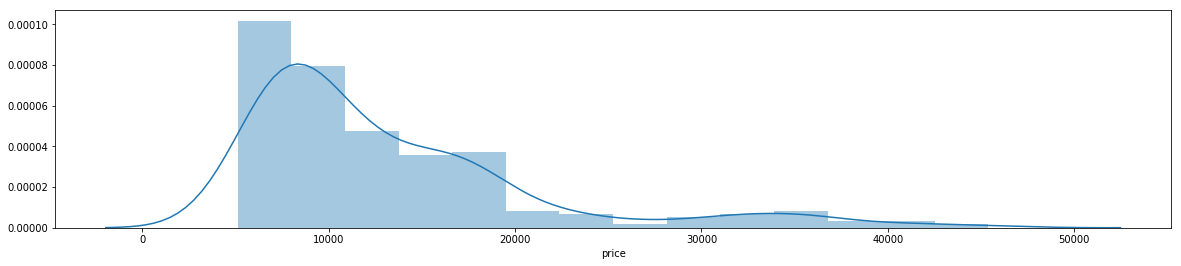

In [20]:
#car price histogram
plt.figure(figsize=(20, 4))
sns.distplot(df['price'])
plt.show()  

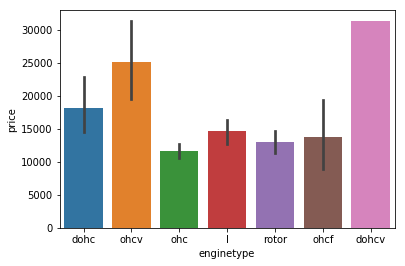

In [21]:
# now analyse bi-variate 
sns.barplot(x='enginetype', y='price', data=df)
plt.show()

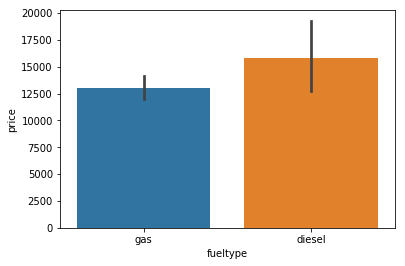

In [22]:
sns.barplot(x='fueltype', y='price', data=df)
plt.show()

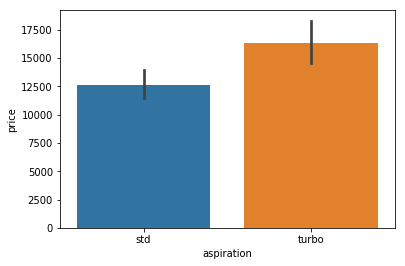

In [23]:
sns.barplot(x='aspiration', y='price', data=df)
plt.show()

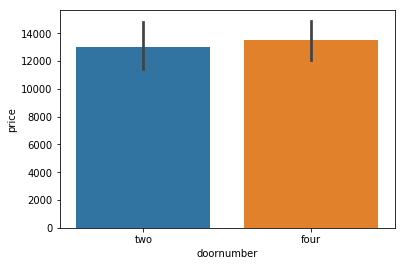

In [24]:
sns.barplot(x='doornumber', y='price', data=df)
plt.show()

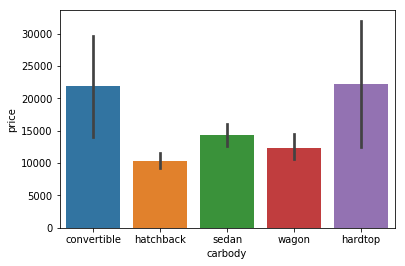

In [25]:
sns.barplot(x='carbody', y='price', data=df)
plt.show()

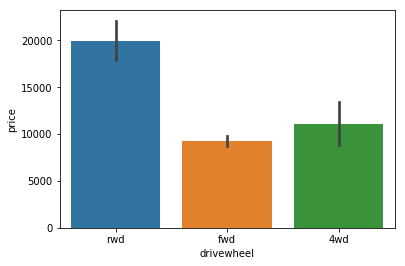

In [26]:
sns.barplot(x='drivewheel', y='price', data=df)
plt.show()

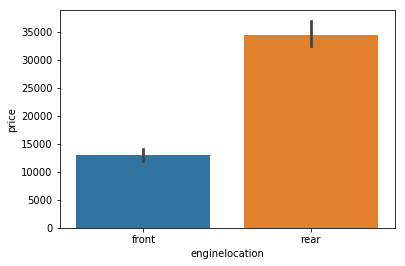

In [27]:
sns.barplot(x='enginelocation', y='price', data=df)
plt.show()

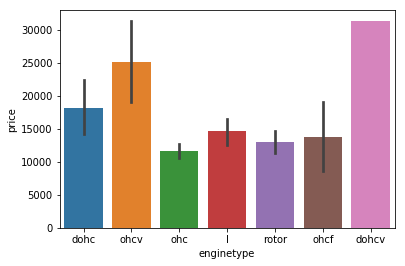

In [28]:
sns.barplot(x='enginetype', y='price', data=df)
plt.show()

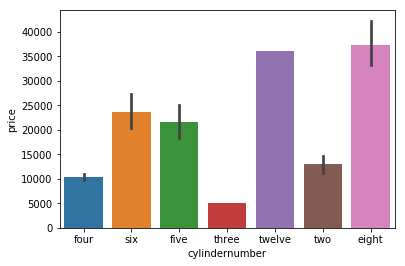

In [29]:
sns.barplot(x='cylindernumber', y='price', data=df)
plt.show()

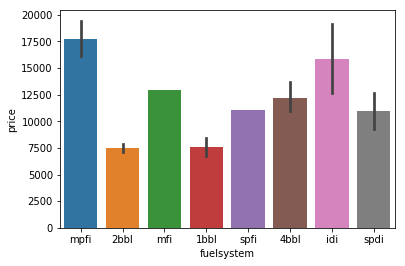

In [30]:
sns.barplot(x='fuelsystem', y='price', data=df)
plt.show()

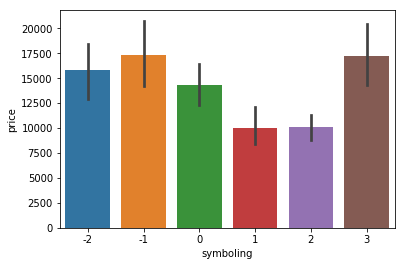

In [31]:
sns.barplot(x='symboling', y='price', data=df)
plt.show()

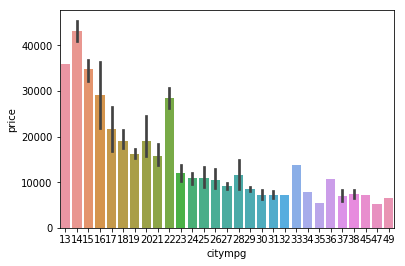

In [32]:
sns.barplot(x='citympg', y='price', data=df)
plt.show()

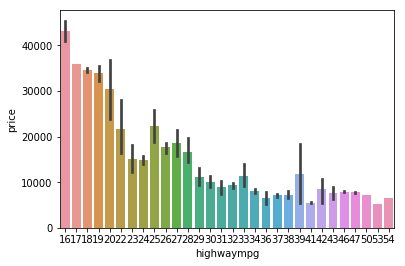

In [33]:
sns.barplot(x='highwaympg', y='price', data=df)
plt.show()

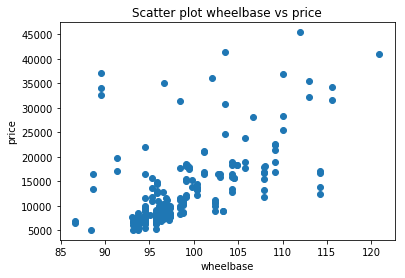

In [34]:
plt.scatter(df['wheelbase'], df['price'])
plt.title('Scatter plot wheelbase vs price')
plt.xlabel('wheelbase')
plt.ylabel('price')
plt.show()

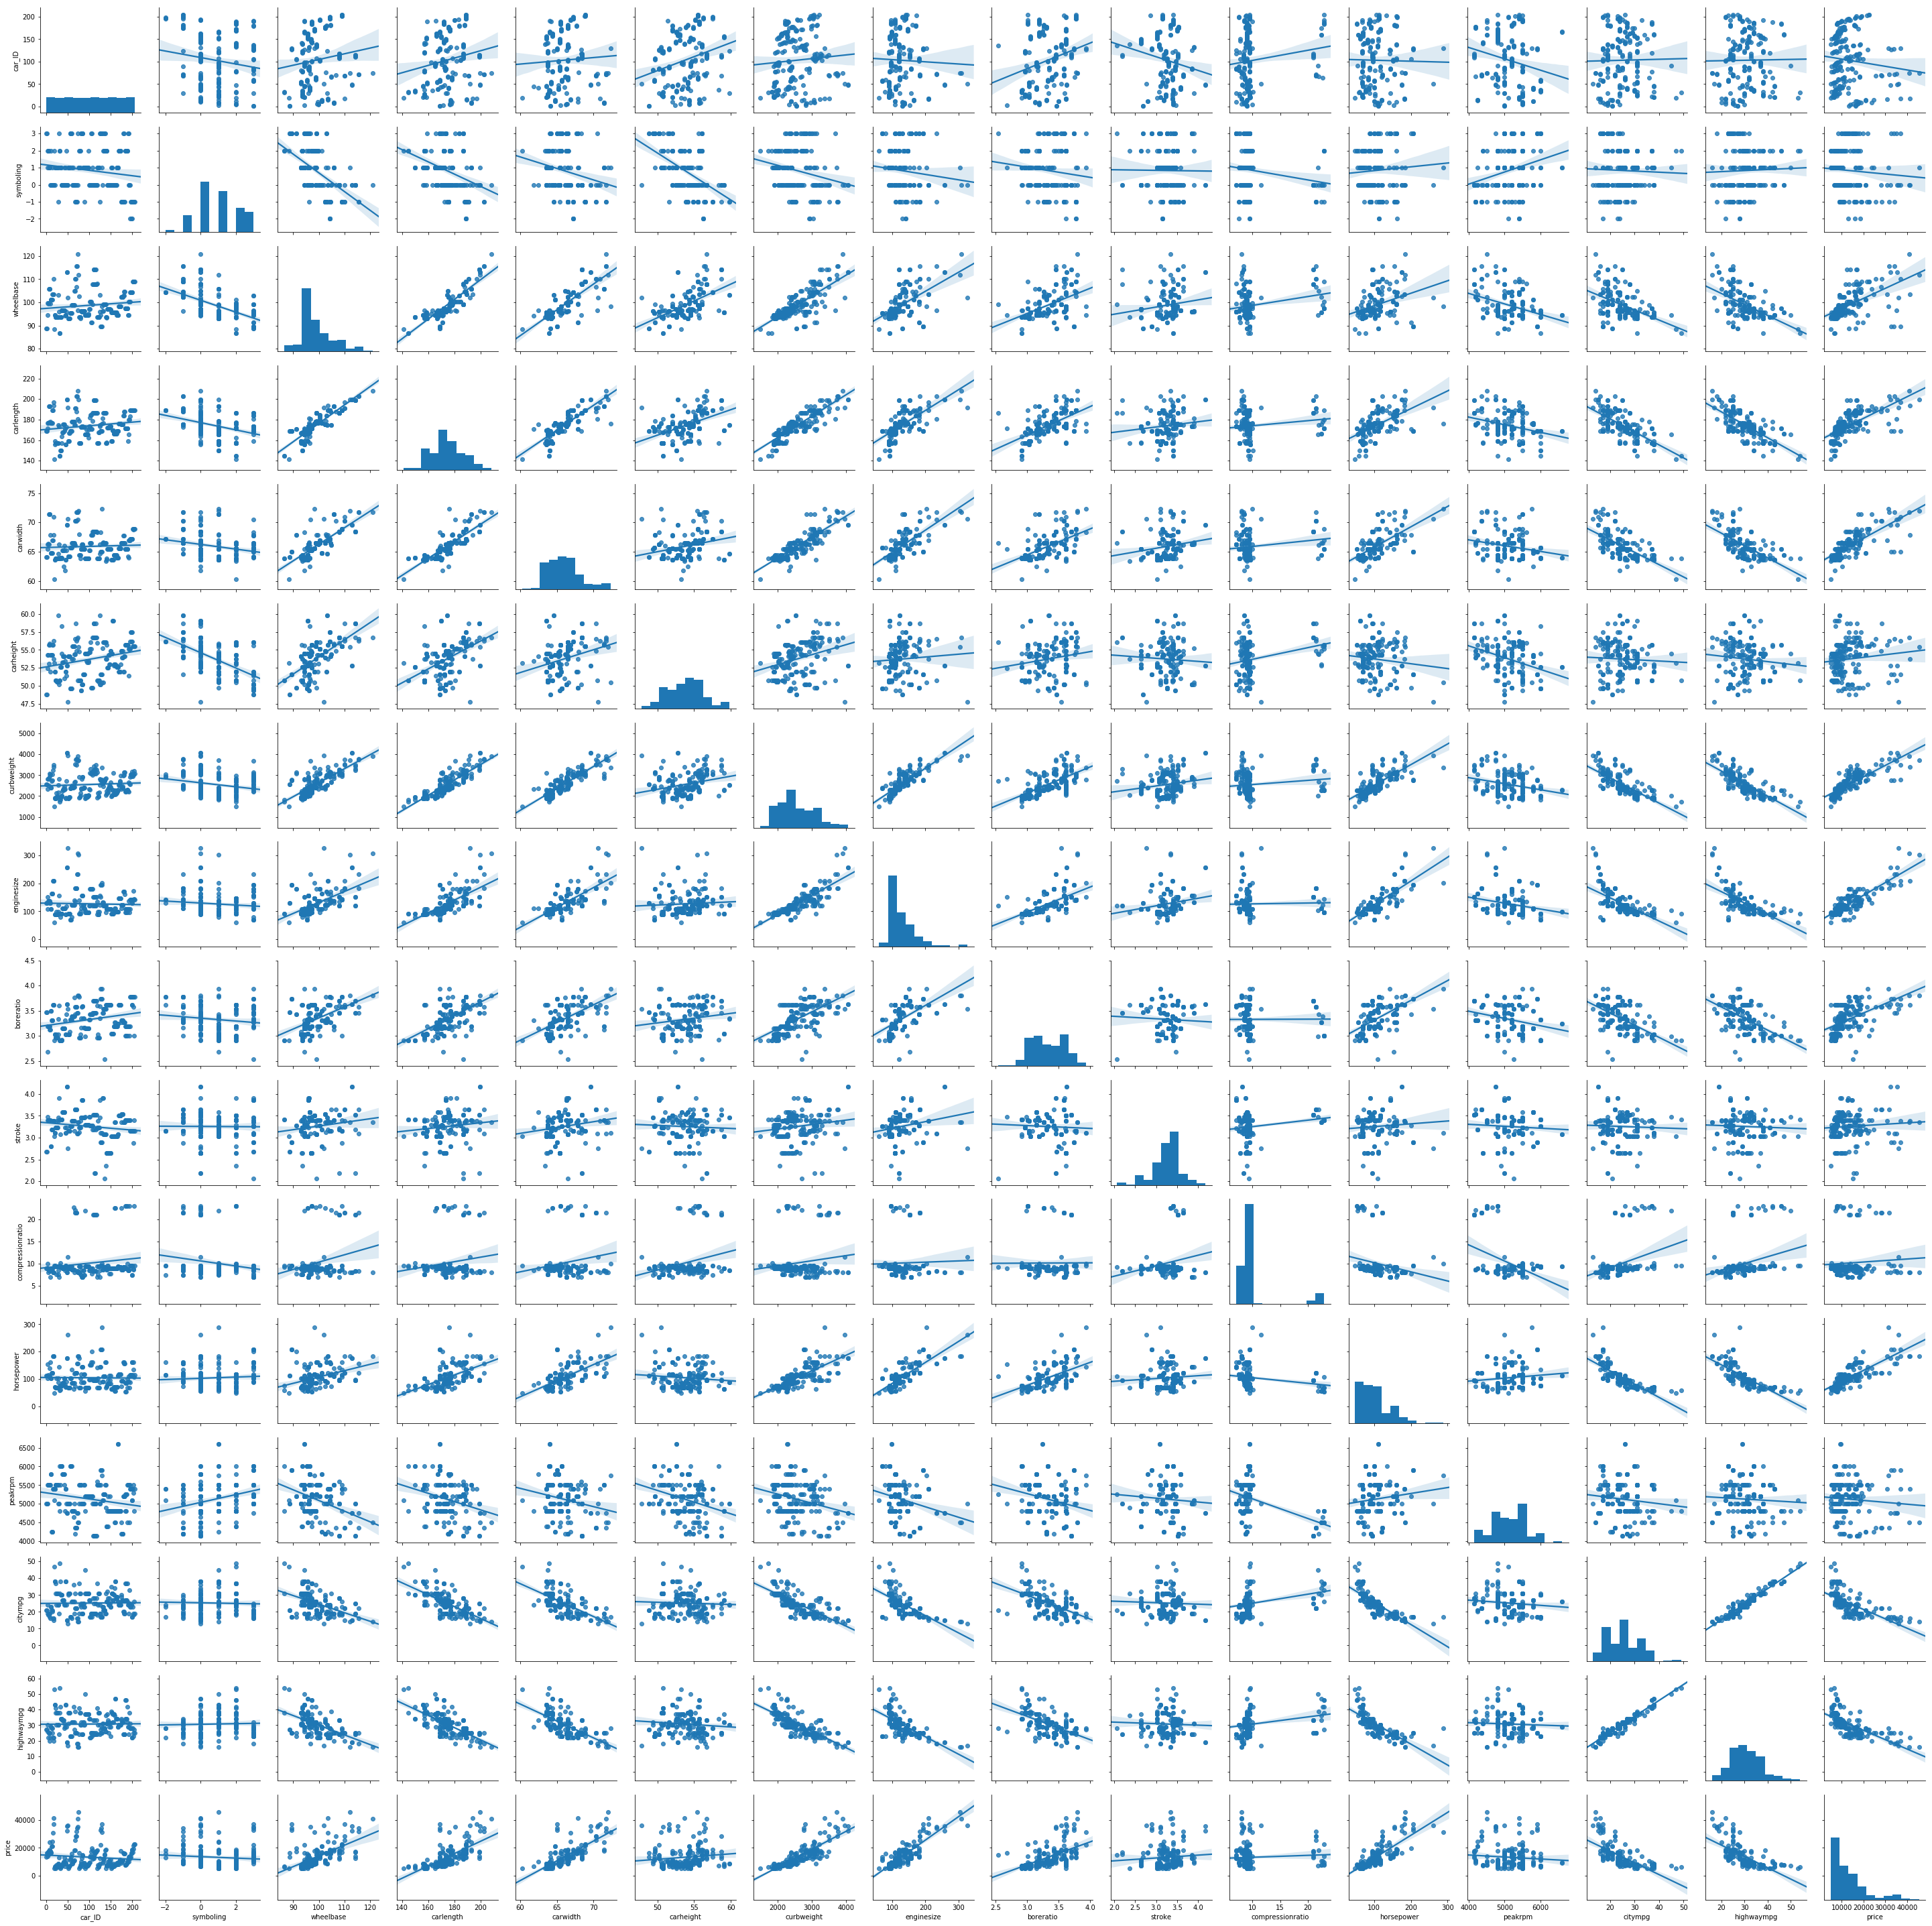

In [35]:
sns.pairplot(df, kind="reg")

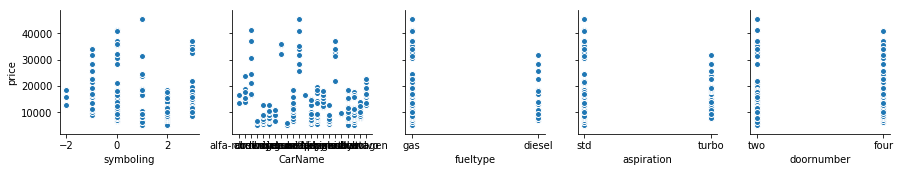

In [36]:
sns.pairplot(df,
                 x_vars=['symboling','CarName','fueltype','aspiration','doornumber'],
                 y_vars=['price'])

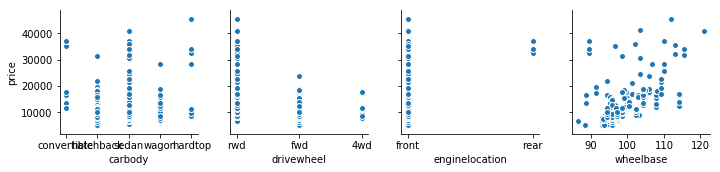

In [37]:
sns.pairplot(df,
                 x_vars=['carbody','drivewheel','enginelocation','wheelbase'],
                 y_vars=['price'])

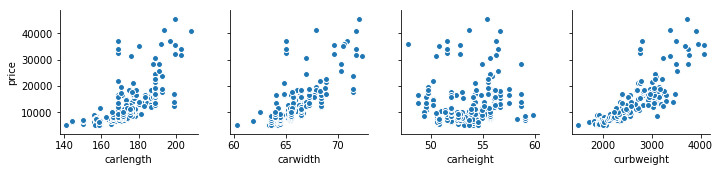

In [38]:
sns.pairplot(df,
                 x_vars=['carlength','carwidth','carheight','curbweight'],
                 y_vars=['price'])

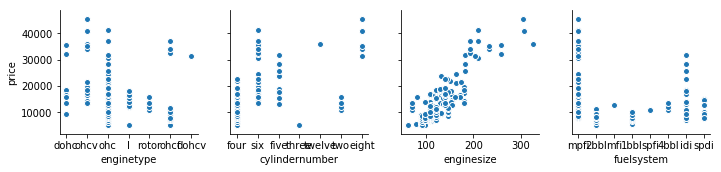

In [39]:
sns.pairplot(df,
                 x_vars=['enginetype','cylindernumber','enginesize','fuelsystem'],
                 y_vars=['price'])

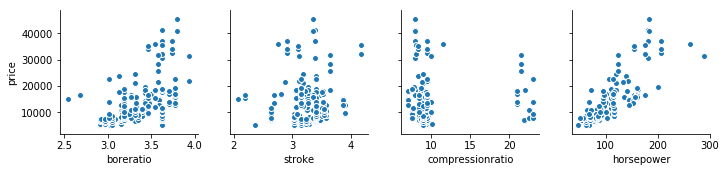

In [40]:


sns.pairplot(df,
                 x_vars=['boreratio','stroke','compressionratio','horsepower'],
                 y_vars=['price'])

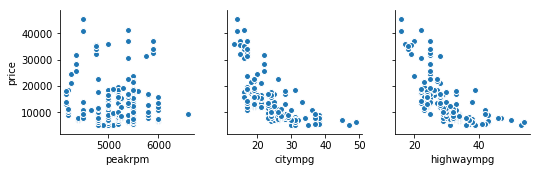

In [41]:

sns.pairplot(df,
                 x_vars=['peakrpm','citympg','highwaympg'],
                 y_vars=['price'])

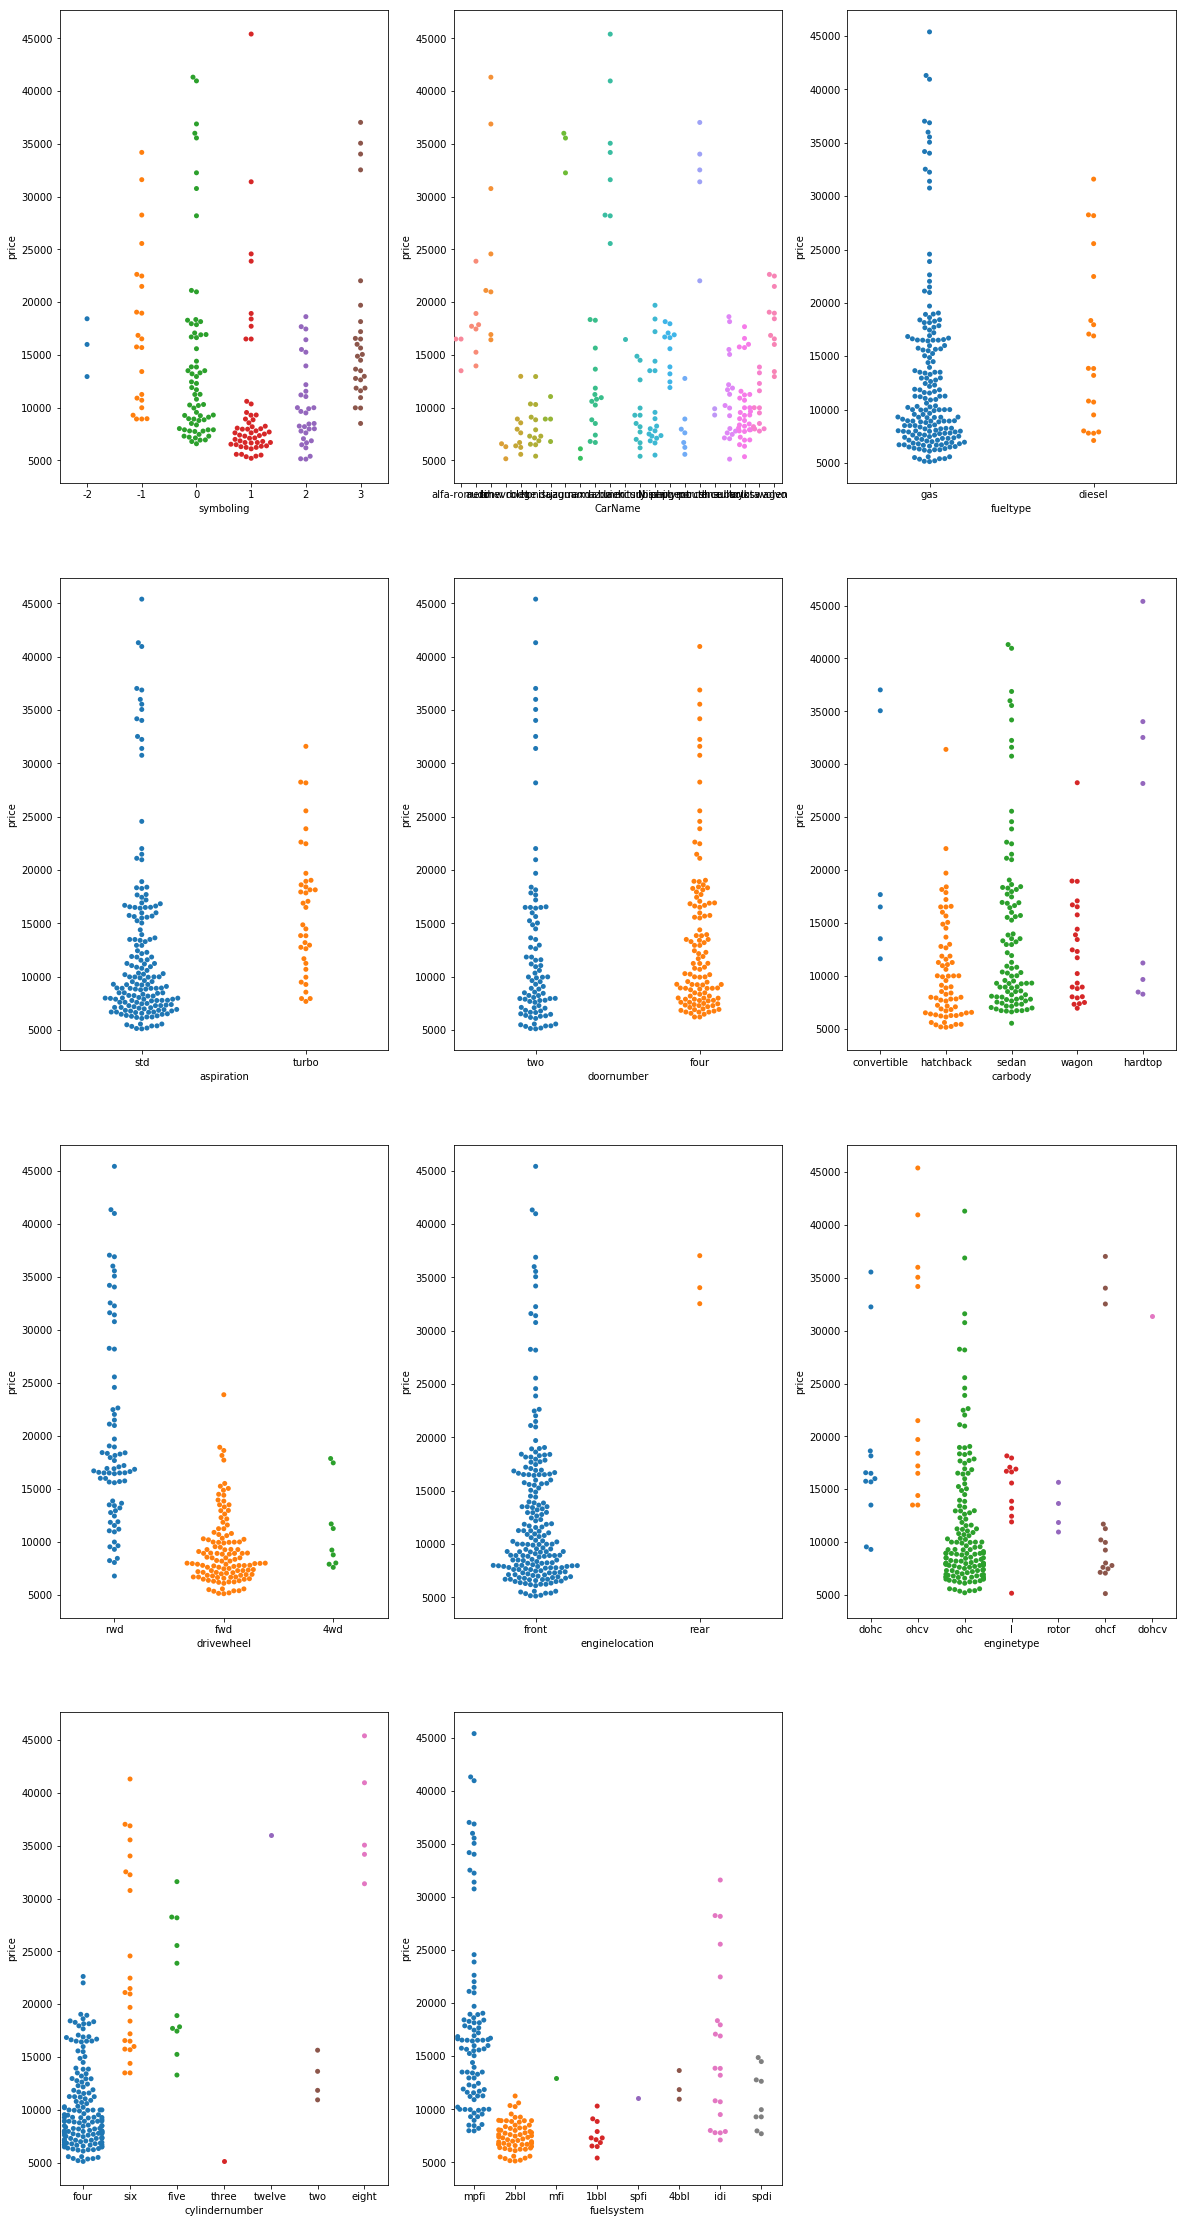

In [42]:
#Visualising all categorical variables

plt.figure(figsize=(20, 40))
plt.subplot(4,3,1)
sns.swarmplot(x = 'symboling', y = 'price', data = df)
plt.subplot(4,3,2)
sns.swarmplot(x = 'CarName', y = 'price', data = df)
plt.subplot(4,3,3)
sns.swarmplot(x = 'fueltype', y = 'price', data = df)
plt.subplot(4,3,4)
sns.swarmplot(x = 'aspiration', y = 'price', data = df)
plt.subplot(4,3,5)
sns.swarmplot(x = 'doornumber', y = 'price', data = df)
plt.subplot(4,3,6)
sns.swarmplot(x = 'carbody', y = 'price', data = df)
plt.subplot(4,3,7)
sns.swarmplot(x = 'drivewheel', y = 'price', data = df)
plt.subplot(4,3,8)
sns.swarmplot(x = 'enginelocation', y = 'price', data = df)
plt.subplot(4,3,9)
sns.swarmplot(x = 'enginetype', y = 'price', data = df)
plt.subplot(4,3,10)
sns.swarmplot(x = 'cylindernumber', y = 'price', data = df)
plt.subplot(4,3,11)
sns.swarmplot(x = 'fuelsystem', y = 'price', data = df)

plt.show()

## Analysis 
Features that might have an impact on price

fuelsystem-mpfi and idi
cylindernumber(5,6,8)
drivewheel ( rwd),
carbody (sedan),
fueltype(gas),
aspiration(std),
caycompany,
enginetype ,


Features that have no impact on price:=
symboling,
engine location,

In [43]:
# More cleaning
# few values of 'drivewheel' feature exist incorrectly ("4wd" instead of "fwd") 
df['drivewheel']=df['drivewheel'].apply(lambda x:x.replace("4wd","fwd"))
df.drivewheel.value_counts()

fwd    129
rwd     76
Name: drivewheel, dtype: int64

In [44]:
# Drop the "car_ID","symboling" features as they do not have any linear relation with car price
df.drop(["car_ID","symboling"],axis=1,inplace=True)

## Dummy Variables replacement for categorical variables

In [45]:

CarName = pd.get_dummies(df['CarName'],drop_first = True)
df = pd.concat([df, CarName], axis = 1) # alfa,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazd,mercury,mitsubishi,
                                            # nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,

fueltype = pd.get_dummies(df['fueltype'],prefix ="fuel",drop_first = True)
df = pd.concat([df, fueltype], axis = 1) # gas,diesel

aspiration= pd.get_dummies(df['aspiration'],prefix ="aspiration",drop_first = True)
df = pd.concat([df, aspiration], axis = 1) # std , turbo

doornumber= pd.get_dummies(df['doornumber'],prefix ="doors", drop_first = True)
df = pd.concat([df, doornumber], axis = 1) # four, two
df=df.rename(index=str, columns={"two": "twodoors"})


carbody= pd.get_dummies(df['carbody'],prefix ="body",drop_first = True)
df = pd.concat([df, carbody], axis = 1) # convertible(default) , hardtop , hatchback , sedan, wagon

drivewheel= pd.get_dummies(df['drivewheel'],prefix ="drivewheel", drop_first = True)
df = pd.concat([df, drivewheel], axis = 1) # 4wd(default) , fwd rwd

enginelocation= pd.get_dummies(df['enginelocation'],prefix ="engineloc",drop_first = True)
df = pd.concat([df, enginelocation], axis = 1) # front,rear


enginetype= pd.get_dummies(df['enginetype'],prefix ="enginetype",drop_first = True)
df = pd.concat([df, enginetype], axis = 1) # dohc,dohcv,l,ohc,ohcf,ohcv,rotor

cylindernumber= pd.get_dummies(df['cylindernumber'],prefix ="cylinder",drop_first = True)
df = pd.concat([df, cylindernumber], axis = 1) # eight five four six three twelve two

fuelsystem= pd.get_dummies(df['fuelsystem'],prefix ="fuelsys",drop_first = True)
df = pd.concat([df, fuelsystem], axis = 1) # 1bbl 2bbl 4bbl idi mfi mpfi spdi spfi


df.head()
df.shape

(205, 73)

## Drop columns for which we created the dummy variable

In [46]:
df.drop(['fueltype'], axis = 1, inplace = True)
df.drop(['aspiration'], axis = 1, inplace = True)
df.drop(['doornumber'], axis = 1, inplace = True)
df.drop(['carbody'], axis = 1, inplace = True)
df.drop(['drivewheel'], axis = 1, inplace = True)
df.drop(['enginelocation'], axis = 1, inplace = True)
df.drop(['enginetype'], axis = 1, inplace = True)

df.drop(['cylindernumber'], axis = 1, inplace = True)
df.drop(['fuelsystem'], axis = 1, inplace = True)
df.drop(['CarName'], axis = 1, inplace = True)


df.head()

wheelbase  carlength  carwidth  carheight  curbweight  enginesize  \
0       88.6      168.8      64.1       48.8        2548         130   
1       88.6      168.8      64.1       48.8        2548         130   
2       94.5      171.2      65.5       52.4        2823         152   
3       99.8      176.6      66.2       54.3        2337         109   
4       99.4      176.6      66.4       54.3        2824         136   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  alfa-romero  audi  bmw  buick  chevrolet  dodge  \
0          27  13495.0            1     0    0      0          0      0   
1          27  16500.0            1     0    0      0          0      0   
2          26  16500.0            1     0    0      0          0      0   
3          30  13950.0            0     1    0      0          0      0   
4          22  17450.0            0     1    0      0          0      0   

   honda  isuzu  jaguar  maxda  mazda  mercury  mitsubishi  peugeot  plymouth  \
0      0      0       0      0      0        0           0        0         0   
1      0      0       0      0      0        0           0        0         0   
2      0      0       0      0      0        0           0        0         0   
3      0      0       0      0      0        0           0        0         0   
4      0      0       0      0      0        0           0        0         0   

   porcshce  renault  subaru  toyota  volkswagen  volvo  fuel_gas  \
0         0        0       0       0           0      0         1   
1         0        0       0       0           0      0         1   
2         0        0       0       0           0      0         1   
3         0        0       0       0           0      0         1   
4         0        0       0       0           0      0         1   

   aspiration_turbo  doors_two  body_hardtop  body_hatchback  body_sedan  \
0                 0          1             0               0           0   
1                 0          1             0               0           0   
2                 0          1             0               1           0   
3                 0          0             0               0           1   
4                 0          0             0               0           1   

   body_wagon  drivewheel_rwd  engineloc_rear  enginetype_dohcv  enginetype_l  \
0           0               1               0                 0             0   
1           0               1               0                 0             0   
2           0               1               0                 0             0   
3           0               0               0                 0             0   
4           0               0               0                 0             0   

   enginetype_ohc  enginetype_ohcf  enginetype_ohcv  enginetype_rotor  \
0               0                0                0                 0   
1               0                0                0                 0   
2               0                0                1                 0   
3               1                0                0                 0   
4               1                0                0                 0   

   cylinder_five  cylinder_four  cylinder_six  cylinder_three  \
0              0              1             0               0   
1              0              1             0               0   
2              0              0             1               0   
3              0              1             0               0   
4              1              0             0               0   

   cylinde

In [47]:
from sklearn.model_selection import train_test_split

# 70% for training set and 30% for testing set
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100) 
print(df_train.shape)
print(df_test.shape)

(143, 63)
(62, 63)


In [48]:
df_train.head()

wheelbase  carlength  carwidth  carheight  curbweight  enginesize  \
122       93.7      167.3      63.8       50.8        2191          98   
125       94.5      168.9      68.3       50.2        2778         151   
166       94.5      168.7      64.0       52.6        2300          98   
1         88.6      168.8      64.1       48.8        2548         130   
199      104.3      188.8      67.2       57.5        3157         130   

     boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
122       2.97    3.23               9.4          68     5500       31   
125       3.94    3.11               9.5         143     5500       19   
166       3.24    3.08               9.4         112     6600       26   
1         3.47    2.68               9.0         111     5000       21   
199       3.62    3.15               7.5         162     5100       17   

     highwaympg    price  alfa-romero  audi  bmw  buick  chevrolet  dodge  \
122          38   7609.0            0     0    0      0          0      0   
125          27  22018.0            0     0    0      0          0      0   
166          29   9538.0            0     0    0      0          0      0   
1            27  16500.0            1     0    0      0          0      0   
199          22  18950.0            0     0    0      0          0      0   

     honda  isuzu  jaguar  maxda  mazda  mercury  mitsubishi  peugeot  \
122      0      0       0      0      0        0           0        0   
125      0      0       0      0      0        0           0        0   
166      0      0       0      0      0        0           0        0   
1        0      0       0      0      0        0           0        0   
199      0      0       0      0      0        0           0        0   

     plymouth  porcshce  renault  subaru  toyota  volkswagen  volvo  fuel_gas  \
122         1         0        0       0       0           0      0         1   
125         0         1        0       0       0           0      0         1   
166         0         0        0       0       1           0      0         1   
1           0         0        0       0       0           0      0         1   
199         0         0        0       0       0           0      1         1   

     aspiration_turbo  doors_two  body_hardtop  body_hatchback  body_sedan  \
122                 0          0             0               0           1   
125                 0          1             0               1           0   
166                 0          1             0               1           0   
1                   0          1             0               0           0   
199                 1          0             0               0           0   

     body_wagon  drivewheel_rwd  engineloc_rear  enginetype_dohcv  \
122           0               0               0                 0   
125           0               1               0                 0   
166           0               1               0                 0   
1             0               1               0                 0   
199           1               1               0                 0   

     enginetype_l  enginetype_ohc  enginetype_ohcf  enginetype_ohcv  \
122             0               1                0                0   
125             0               1                0                0   
166             0               0                0                0   
1               0               0                0                0   
199             0               1                0                0   

     enginetype_rotor  cylinder_five  cylinder_four  cylinder_six  \
122                 0              0              1             0   
125                 0              0              1             0   
166                 0              0              1             0   
1                   0              0              1             0   
199                 0              0              1             0   



## Rescaling of Features

In [49]:

# Perform Min-Max scaling (Normalization) of Numeric features

#Import library
from sklearn.preprocessing import MinMaxScaler

#instantiate an object
scaler = MinMaxScaler()

#List of numeric features for scaling
num_vars = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

# Fit and Transform
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

wheelbase  carlength  carwidth  carheight  curbweight  enginesize  \
122   0.244828   0.426016  0.291667   0.265487    0.272692    0.139623   
125   0.272414   0.452033  0.666667   0.212389    0.500388    0.339623   
166   0.272414   0.448780  0.308333   0.424779    0.314973    0.139623   
1     0.068966   0.450407  0.316667   0.088496    0.411171    0.260377   
199   0.610345   0.775610  0.575000   0.858407    0.647401    0.260377   

     boreratio    stroke  compressionratio  horsepower   peakrpm   citympg  \
122   0.230159  0.525253           0.15000    0.083333  0.551020  0.500000   
125   1.000000  0.464646           0.15625    0.395833  0.551020  0.166667   
166   0.444444  0.449495           0.15000    0.266667  1.000000  0.361111   
1     0.626984  0.247475           0.12500    0.262500  0.346939  0.222222   
199   0.746032  0.484848           0.03125    0.475000  0.387755  0.111111   

     highwaympg     price  alfa-romero  audi  bmw  buick  chevrolet  dodge  \
122    0.567568  0.068818            0     0    0      0          0      0   
125    0.270270  0.466890            0     0    0      0          0      0   
166    0.324324  0.122110            0     0    0      0          0      0   
1      0.270270  0.314446            1     0    0      0          0      0   
199    0.135135  0.382131            0     0    0      0          0      0   

     honda  isuzu  jaguar  maxda  mazda  mercury  mitsubishi  peugeot  \
122      0      0       0      0      0        0           0        0   
125      0      0       0      0      0        0           0        0   
166      0      0       0      0      0        0           0        0   
1        0      0       0      0      0        0           0        0   
199      0      0       0      0      0        0           0        0   

     plymouth  porcshce  renault  subaru  toyota  volkswagen  volvo  fuel_gas  \
122         1         0        0       0       0           0      0         1   
125         0         1        0       0       0           0      0         1   
166         0         0        0       0       1           0      0         1   
1           0         0        0       0       0           0      0         1   
199         0         0        0       0       0           0      1         1   

     aspiration_turbo  doors_two  body_hardtop  body_hatchback  body_sedan  \
122                 0          0             0               0           1   
125                 0          1             0               1           0   
166                 0          1             0               1           0   
1                   0          1             0               0           0   
199                 1          0             0               0           0   

     body_wagon  drivewheel_rwd  engineloc_rear  enginetype_dohcv  \
122           0               0               0                 0   
125           0               1               0                 0   
166           0               1               0                 0   
1             0               1               0                 0   
199           1               1               0                 0   

     enginetype_l  enginetype_ohc  enginetype_ohcf  enginetype_ohcv  \
122             0               1                0                0   
125             0               1                0                0   
166             0               0                0                0   
1               0               0                0                0   
199             0               1                0                0   

     enginetype_rotor  cylinder_five  cylinder_four  cylinder_six  \
122                 0              0              1             0   
125                 0              0              1             0   
166                 0              0              1             0   
1                   0              0              1             0   
199                 0              0    

In [50]:
# Let's look at summary statistics of numeric features after rescaling
df_train[num_vars].describe()

wheelbase   carlength    carwidth   carheight  curbweight  enginesize  \
count  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000   
mean     0.411141    0.525476    0.461655    0.509004    0.407878    0.241351   
std      0.205581    0.204848    0.184517    0.215378    0.211269    0.154619   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.272414    0.399187    0.304167    0.353982    0.245539    0.135849   
50%      0.341379    0.502439    0.425000    0.522124    0.355702    0.184906   
75%      0.503448    0.669919    0.550000    0.668142    0.559542    0.301887   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        boreratio      stroke  compressionratio  horsepower     peakrpm  \
count  143.000000  143.000000        143.000000  143.000000  143.000000   
mean     0.497946    0.535389          0.190787    0.227302    0.400029   
std      0.207140    0.157843          0.237181    0.165511    0.196438   
min      0.000000    0.000000          0.000000    0.000000    0.000000   
25%      0.305556    0.464646          0.100000    0.091667    0.265306   
50%      0.500000    0.545455          0.125000    0.191667    0.428571   
75%      0.682540    0.611111          0.150000    0.283333    0.551020   
max      1.000000    1.000000          1.000000    1.000000    1.000000   

          citympg  highwaympg       price  
count  143.000000  143.000000  143.000000  
mean     0.344211    0.374976    0.219310  
std      0.186165    0.188477    0.215682  
min      0.000000    0.000000    0.000000  
25%      0.166667    0.216216    0.067298  
50%      0.333333    0.378378    0.140343  
75%      0.500000    0.527027    0.313479  
max      1.000000    1.000000    1.000000

## After rescaling perform Heatmap based visual analysis
 Let's check the correlation coefficients to see which features are highly correlated

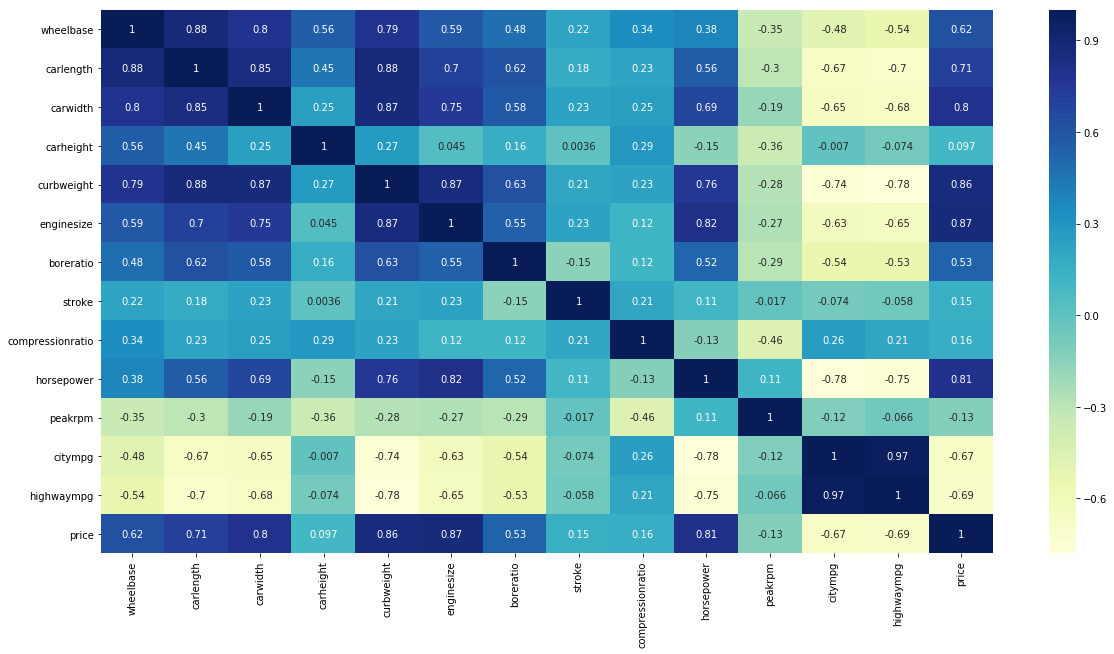

In [51]:
# Creating a heat map to visualise correlation
plt.figure(figsize = (20,10))  
sns.heatmap(df_train[num_vars].corr(), annot = True, cmap="YlGnBu")
plt.show()


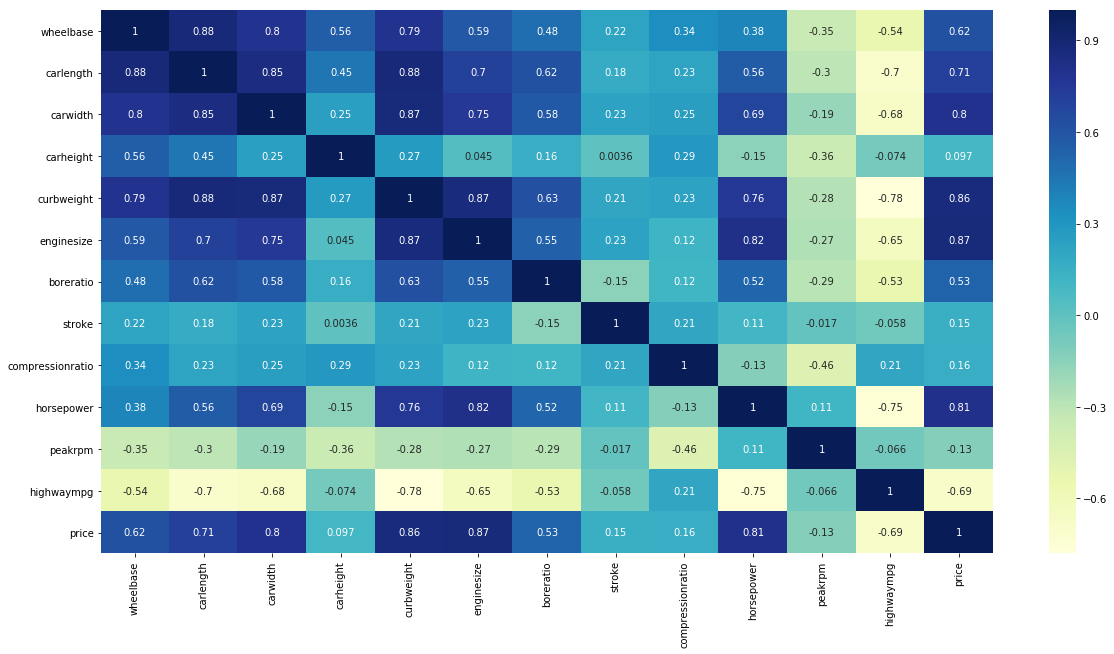


## Observations
From the heatmap, it is observed that as part of train-test split, 2 features(fuelsystem_mfi, company_mercury)
got unique set of values either 0 or 1 that lead to failure to capture correlation
between the independent variables/predictors/features and dependent/target variable(price)
Hence there is a need to randomize the train-test split but ignored for now as these concepts are yet to taught

From the heatmap, the features that have high correlation with price are identified as
horsepower=0.81,enginesize=0.87,curbweight=0.86,carwidth=0.8,carlength=0.71,wheelbase=0.62,
drivewheel_rwd=0.68,cylinder_four=-0.7, cylinder_six=0.5,boreratio=0.53,citympg=-0.67,
highwaympg=-0.69,fuelsystem_2bbl=-0.54,fuelsystem_mpfi=0.52

In [52]:
#Training the Model
# Dividing into X and Y sets for the model building
y_train = df_train.pop('price')
X_train = df_train

In [53]:
# Splitting into Training and Testing Sets
from sklearn.model_selection import train_test_split
import numpy as np
# 70% for training set and 30% for testing set
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100) 
print(df_train.shape)
print(df_test.shape)

(143, 63)
(62, 63)


## Create the Model
Recursive Feature Elimination (RFE)

In [54]:
# Import RFE and Linear Regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [55]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)# running RFE
rfe = rfe.fit(X_train, y_train)

In [56]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 10),
 ('carlength', False, 17),
 ('carwidth', True, 1),
 ('carheight', False, 11),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 21),
 ('horsepower', False, 9),
 ('peakrpm', False, 8),
 ('citympg', False, 33),
 ('highwaympg', False, 18),
 ('alfa-romero', False, 38),
 ('audi', False, 31),
 ('bmw', True, 1),
 ('buick', False, 32),
 ('chevrolet', False, 19),
 ('dodge', False, 13),
 ('honda', False, 14),
 ('isuzu', False, 39),
 ('jaguar', False, 15),
 ('maxda', False, 37),
 ('mazda', False, 45),
 ('mercury', False, 46),
 ('mitsubishi', False, 5),
 ('peugeot', True, 1),
 ('plymouth', False, 12),
 ('porcshce', True, 1),
 ('renault', False, 34),
 ('subaru', False, 7),
 ('toyota', False, 42),
 ('volkswagen', False, 43),
 ('volvo', False, 3),
 ('fuel_gas', False, 23),
 ('aspiration_turbo', False, 6),
 ('doors_two', False, 41),
 ('body_hardtop', False, 25),
 ('body_hatchback', False, 24),
 ('b

In [57]:
# Features that have RFE support
col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'bmw',
       'peugeot', 'porcshce', 'engineloc_rear', 'enginetype_rotor',
       'cylinder_five', 'cylinder_four', 'cylinder_three', 'cylinder_twelve',
       'cylinder_two'],
      dtype='object')

In [58]:
# Features that does not have RFE support
X_train.columns[~rfe.support_]

Index(['wheelbase', 'carlength', 'carheight', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'alfa-romero', 'audi', 'buick',
       'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'maxda', 'mazda',
       'mercury', 'mitsubishi', 'plymouth', 'renault', 'subaru', 'toyota',
       'volkswagen', 'volvo', 'fuel_gas', 'aspiration_turbo', 'doors_two',
       'body_hardtop', 'body_hatchback', 'body_sedan', 'body_wagon',
       'drivewheel_rwd', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'cylinder_six', 'fuelsys_2bbl',
       'fuelsys_4bbl', 'fuelsys_idi', 'fuelsys_mfi', 'fuelsys_mpfi',
       'fuelsys_spdi', 'fuelsys_spfi'],
      dtype='object')

## Building model using statsmodel

In [59]:
#Filter train set to keep only the 15 columns chosen by RFE
X_train_rfe = X_train[col]
X_train_rfe.columns

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'bmw',
       'peugeot', 'porcshce', 'engineloc_rear', 'enginetype_rotor',
       'cylinder_five', 'cylinder_four', 'cylinder_three', 'cylinder_twelve',
       'cylinder_two'],
      dtype='object')

In [60]:
# Import stats model
import statsmodels.api as sm

# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

# Analyse the summary statistics of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     141.8
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           1.03e-70
Time:                        16:42:51   Log-Likelihood:                 217.45
No. Observations:                 143   AIC:                            -404.9
Df Residuals:                     128   BIC:                            -360.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2770      0.038  

In [61]:
#Check VIF values to find variables with high correaltion

# import VIF module
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features        VIF
10  enginetype_rotor        inf
15      cylinder_two        inf
0              const  65.220000
3         enginesize  27.430000
12     cylinder_four  13.230000
2         curbweight  11.400000
1           carwidth   6.060000
4          boreratio   5.630000
14   cylinder_twelve   3.050000
11     cylinder_five   2.910000
5             stroke   2.460000
8           porcshce   1.890000
9     engineloc_rear   1.770000
13    cylinder_three   1.770000
7            peugeot   1.700000
6                bmw   1.300000

## Observations from above analysis

=>VIF is inf for "enginetype_rotor", "cylinder_two" features that indicate high colinearity

=>p-values of all features are 0.00 that represent significant

=>Let's drop "enginetype_rotor" and repeat the analysis

## Manual feature selction using backward elimination 

Drop the enginetype_rotor feature and Rebuild the model

In [62]:
# Drop the feature
X_train_new = X_train_rfe.drop(["enginetype_rotor"], axis = 1)

# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     141.8
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           1.03e-70
Time:                        16:42:51   Log-Likelihood:                 217.45
No. Observations:                 143   AIC:                            -404.9
Df Residuals:                     128   BIC:                            -360.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.2770      0.038     

Features    VIF
0             const  65.22
3        enginesize  27.43
11    cylinder_four  13.23
2        curbweight  11.40
1          carwidth   6.06
4         boreratio   5.63
14     cylinder_two   5.46
13  cylinder_twelve   3.05
10    cylinder_five   2.91
5            stroke   2.46
8          porcshce   1.89
9    engineloc_rear   1.77
12   cylinder_three   1.77
7           peugeot   1.70
6               bmw   1.30

## Observations

p-values of other features are not impacted <br>

"cylinder_two" colinearity has been significantly reduced <br>

R2, Adjusted R2, AIC, BIC remain same<br>

Drop "enginesize" due to high VIF 27.43

In [63]:
# Drop the feature enginesize and re do
X_train_new = X_train_rfe.drop(["enginetype_rotor","enginesize"], axis = 1)

# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     101.3
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           5.01e-61
Time:                        16:42:51   Log-Likelihood:                 189.73
No. Observations:                 143   AIC:                            -351.5
Df Residuals:                     129   BIC:                            -310.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1639      0.042     

Features    VIF
0             const  55.57
2        curbweight   9.11
1          carwidth   6.03
10    cylinder_four   5.50
3         boreratio   3.33
7          porcshce   1.89
8    engineloc_rear   1.74
13     cylinder_two   1.65
6           peugeot   1.64
9     cylinder_five   1.64
4            stroke   1.42
11   cylinder_three   1.41
5               bmw   1.29
12  cylinder_twelve   1.17

In [64]:
# Drop the feature enginesize and re do
X_train_new = X_train_rfe.drop(["enginetype_rotor","enginesize","curbweight"], axis = 1)

# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     70.97
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           5.10e-51
Time:                        16:42:51   Log-Likelihood:                 161.50
No. Observations:                 143   AIC:                            -297.0
Df Residuals:                     130   BIC:                            -258.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0763      0.049     

Features    VIF
0             const  51.73
1          carwidth   4.72
9     cylinder_four   3.39
2         boreratio   2.29
6          porcshce   1.74
7    engineloc_rear   1.74
8     cylinder_five   1.53
5           peugeot   1.40
12     cylinder_two   1.34
10   cylinder_three   1.31
3            stroke   1.30
4               bmw   1.27
11  cylinder_twelve   1.13

## from above VIF < 5 but probability of porcshce and cylinder_three       is high so drop one by one

In [65]:
X_train_new.columns

Index(['const', 'carwidth', 'boreratio', 'stroke', 'bmw', 'peugeot',
       'porcshce', 'engineloc_rear', 'cylinder_five', 'cylinder_four',
       'cylinder_three', 'cylinder_twelve', 'cylinder_two'],
      dtype='object')

In [66]:
# Drop the feature  and re do
X_train_new = X_train_rfe.drop(["enginetype_rotor","enginesize","curbweight","porcshce"], axis = 1)

# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     77.72
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           6.97e-52
Time:                        16:42:51   Log-Likelihood:                 161.27
No. Observations:                 143   AIC:                            -298.5
Df Residuals:                     131   BIC:                            -263.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0806      0.049     

Features    VIF
0             const  50.83
1          carwidth   4.57
8     cylinder_four   3.38
2         boreratio   2.25
7     cylinder_five   1.50
5           peugeot   1.36
11     cylinder_two   1.34
9    cylinder_three   1.31
3            stroke   1.29
4               bmw   1.27
6    engineloc_rear   1.19
10  cylinder_twelve   1.12

## from above VIF < 5 but probability of cylinder_three       is high so drop 

In [67]:

# Drop the feature  and re do
X_train_new = X_train_rfe.drop(["enginetype_rotor","enginesize","curbweight","porcshce","cylinder_three"], axis = 1)

# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     86.08
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           7.66e-53
Time:                        16:42:51   Log-Likelihood:                 161.21
No. Observations:                 143   AIC:                            -300.4
Df Residuals:                     132   BIC:                            -267.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0743      0.044     

Features    VIF
0             const  41.93
1          carwidth   3.84
8     cylinder_four   2.74
2         boreratio   2.20
7     cylinder_five   1.50
5           peugeot   1.30
3            stroke   1.29
10     cylinder_two   1.27
4               bmw   1.23
6    engineloc_rear   1.16
9   cylinder_twelve   1.12

## from above VIF < 5 and  probability is also <0.05

In [68]:
# display final columns 
X_train_new.columns

Index(['const', 'carwidth', 'boreratio', 'stroke', 'bmw', 'peugeot',
       'engineloc_rear', 'cylinder_five', 'cylinder_four', 'cylinder_twelve',
       'cylinder_two'],
      dtype='object')

In [69]:
X_train_Final=X_train_new

## Residual Analysis of the train data

To validate assumptions of the model, and hence the reliability for inference



#### Distribution of the error terms
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


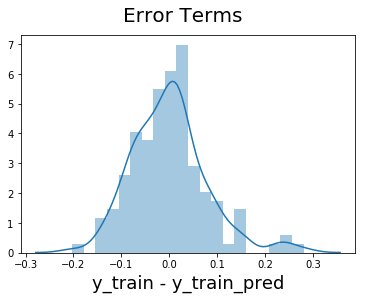

In [70]:
y_train_pred = lm.predict(X_train_lm)

# Plot the histogram of the error terms
fig = plt.figure()
res = (y_train - y_train_pred)
sns.distplot(res, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 18)                         # X-label
plt.show()

## The residuals are following the normally distributed with a mean 0. All good!

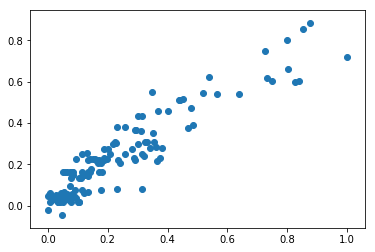

In [71]:
#Looking for patterns in the residuals
plt.scatter(y_train, y_train_pred)
plt.show()

## Making Predictions Using the Final Model

Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, you first need to add a constant to the X_test data like you did for X_train and then you can simply go on and predict the y values corresponding to X_test using the predict attribute of the fitted regression line

In [72]:
df_test.head()


wheelbase  carlength  carwidth  carheight  curbweight  enginesize  \
160       95.7      166.3      64.4       53.0        2094          98   
186       97.3      171.7      65.5       55.7        2275         109   
59        98.8      177.8      66.5       53.7        2385         122   
165       94.5      168.7      64.0       52.6        2265          98   
140       93.3      157.3      63.8       55.7        2240         108   

     boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
160       3.19    3.03               9.0          70     4800       38   
186       3.19    3.40               9.0          85     5250       27   
59        3.39    3.39               8.6          84     4800       26   
165       3.24    3.08               9.4         112     6600       26   
140       3.62    2.64               8.7          73     4400       26   

     highwaympg   price  alfa-romero  audi  bmw  buick  chevrolet  dodge  \
160          47  7738.0            0     0    0      0          0      0   
186          34  8495.0            0     0    0      0          0      0   
59           32  8845.0            0     0    0      0          0      0   
165          29  9298.0            0     0    0      0          0      0   
140          31  7603.0            0     0    0      0          0      0   

     honda  isuzu  jaguar  maxda  mazda  mercury  mitsubishi  peugeot  \
160      0      0       0      0      0        0           0        0   
186      0      0       0      0      0        0           0        0   
59       0      0       0      0      1        0           0        0   
165      0      0       0      0      0        0           0        0   
140      0      0       0      0      0        0           0        0   

     plymouth  porcshce  renault  subaru  toyota  volkswagen  volvo  fuel_gas  \
160         0         0        0       0       1           0      0         1   
186         0         0        0       0       0           1      0         1   
59          0         0        0       0       0           0      0         1   
165         0         0        0       0       1           0      0         1   
140         0         0        0       1       0           0      0         1   

     aspiration_turbo  doors_two  body_hardtop  body_hatchback  body_sedan  \
160                 0          0             0               0           1   
186                 0          0             0               0           1   
59                  0          1             0               1           0   
165                 0          1             0               0           1   
140                 0          1             0               1           0   

     body_wagon  drivewheel_rwd  engineloc_rear  enginetype_dohcv  \
160           0               0               0                 0   
186           0               0               0                 0   
59            0               0               0                 0   
165           0               1               0                 0   
140           0               0               0                 0   

     enginetype_l  enginetype_ohc  enginetype_ohcf  enginetype_ohcv  \
160             0               1                0                0   
186             0               1                0                0   
59              0               1                0                0   
165             0               0                0                0   
140             0               0                1                0   

     enginetype_rotor  cylinder_five  cylinder_four  cylinder_six  \
160                 0              0              1             0   
186                 0              0              1             0   
59                  0              0              1             0   
165                 0              0              1             0   
140                 0              0              1             0   

     c

In [73]:
num_vars = ['wheelbase','carlength','carwidth','carheight','enginesize','curbweight','boreratio','stroke','compressionratio','horsepower'
            ,'peakrpm','highwaympg','price']

df_test_mod = scaler.fit_transform(df_test[num_vars])

In [78]:
# Removing the columns and getting only those were usedin train data set
X_test_drop = df_test[X_train_new.drop('const',axis = 1).columns]

# Adding a constant variable 
X_test_drop = sm.add_constant(X_test_drop)
X_test_drop

const  carwidth  boreratio  stroke  bmw  peugeot  engineloc_rear  \
160    1.0      64.4       3.19    3.03    0        0               0   
186    1.0      65.5       3.19    3.40    0        0               0   
59     1.0      66.5       3.39    3.39    0        0               0   
165    1.0      64.0       3.24    3.08    0        0               0   
140    1.0      63.8       3.62    2.64    0        0               0   
64     1.0      66.5       3.39    3.39    0        0               0   
198    1.0      67.2       3.62    3.15    0        0               0   
75     1.0      68.0       3.78    3.12    0        0               0   
172    1.0      65.6       3.62    3.50    0        0               0   
104    1.0      67.9       3.43    3.27    0        0               0   
200    1.0      68.9       3.78    3.15    0        0               0   
136    1.0      66.5       3.54    3.07    0        0               0   
111    1.0      68.4       3.46    2.19    0        1               0   
41     1.0      65.2       3.15    3.58    0        0               0   
73     1.0      71.7       3.80    3.35    0        0               0   
31     1.0      63.9       2.91    3.41    0        0               0   
156    1.0      64.4       3.19    3.03    0        0               0   
133    1.0      66.5       3.54    3.07    0        0               0   
65     1.0      66.1       3.76    3.16    0        0               0   
83     1.0      66.3       3.59    3.86    0        0               0   
195    1.0      67.2       3.78    3.15    0        0               0   
197    1.0      67.2       3.78    3.15    0        0               0   
126    1.0      65.0       3.74    2.90    0        0               1   
118    1.0      63.8       2.97    3.23    0        0               0   
167    1.0      65.6       3.62    3.50    0        0               0   
101    1.0      66.5       3.43    3.27    0        0               0   
124    1.0      66.3       3.59    3.86    0        0               0   
69     1.0      70.3       3.58    3.64    0        0               0   
11     1.0      64.8       3.50    2.80    1        0               0   
46     1.0      65.2       3.43    3.23    0        0               0   
77     1.0      64.4       2.97    3.23    0        0               0   
15     1.0      66.9       3.62    3.39    1        0               0   
110    1.0      68.4       3.70    3.52    0        1               0   
201    1.0      68.8       3.78    3.15    0        0               0   
115    1.0      68.4       3.46    3.19    0        1               0   
174    1.0      66.5       3.27    3.35    0        0               0   
134    1.0      66.5       2.54    2.07    0        0               0   
169    1.0      65.6       3.62    3.50    0        0               0   
92     1.0      63.8       3.15    3.29    0        0               0   
173    1.0      66.5       3.31    3.54    0        0               0   
74     1.0      72.0       3.80    3.35    0        0               0   
3      1.0      66.2       3.19    3.40    0        0               0   
157    1.0      64.4       3.19    3.03    0        0               0   
81     1.0      65.4       3.35    3.46    0        0               0   
32     1.0      64.0       2.91    3.07    0        0               0   
99     1.0      65.2       3.33    3.47    0        0               0   
26     1.0      63.8       2.97    3.23    0        0               0   
88     1.0      65.4       3.17    3.46    0        0               0   
184    1.0      65.5       3.01    3.40    0        0               0   
187    1.0      65.5       3.01    3.40    0        0               0   
52     1.0      64.2       3.03    3.15    0        0               0   
168    1.0      65.6       3.62    3.50    0        0               0   
164    1.0      64.0       3.19    3.03    0        0               0   
188    1.0      65.5       3.19    3.40    0        0          

In [79]:
# Making predictions
y_test_pred = lm.predict(X_test_drop)
y_test_pred

160    42.532797
186    43.276726
59     43.957635
165    42.281294
140    42.173595
64     43.957635
198    44.431263
75     44.974541
172    43.407704
104    45.027528
200    45.565241
136    43.957124
111    45.074151
41     43.086858
73     47.569266
31     42.192363
156    42.532797
133    43.957124
65     43.731573
83     43.885205
195    44.453208
197    44.453208
126    43.626408
118    42.123319
167    43.407704
101    44.111736
124    43.885205
69     46.566005
11     43.058742
46     43.102201
77     42.515801
15     44.644282
110    45.194696
201    45.499827
115    45.140037
174    43.938541
134    43.754085
169    43.407704
92     42.151959
173    43.956546
74     47.765508
3      43.734622
157    42.532797
81     43.237210
32     42.235375
99     43.104298
26     42.123319
88     43.212522
184    43.252039
187    43.252039
52     42.387932
168    43.407704
164    42.271143
188    43.276726
7      47.216253
158    42.564853
123    42.713900
28     42.712529
29     43.8892

In [80]:
y_test = df_test.pop('price')
X_test = df_test

Text(0,0.5,'y_pred')

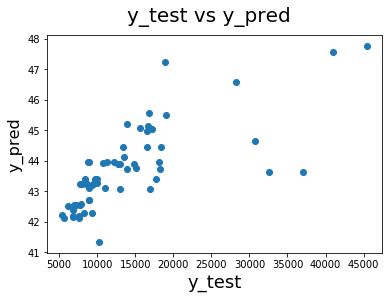

In [81]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [83]:
# Finding r2 score
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

-2.6961086693351093

In [84]:
# Run the Linear model on X and y tarins 
lm_test = sm.OLS(y_test,X_test_drop).fit()

print(lm_test.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     40.06
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           8.36e-20
Time:                        16:46:53   Log-Likelihood:                -587.44
No. Observations:                  62   AIC:                             1193.
Df Residuals:                      53   BIC:                             1212.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.526e+05   2.55e+04     